**PNEUMONIA CLASSIFICATION**

In [3]:
import pandas as pd 
import os
import cv2
import fnmatch
%matplotlib inline
import matplotlib.image as mpimg
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential,load_model,Model
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam,RMSprop,Nadam
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D, GlobalAveragePooling2D, Input,SeparableConv2D
from tensorflow.keras.layers import BatchNormalization,LayerNormalization
from tensorflow.keras.callbacks  import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.applications import VGG19,VGG16,ResNet50,Xception
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


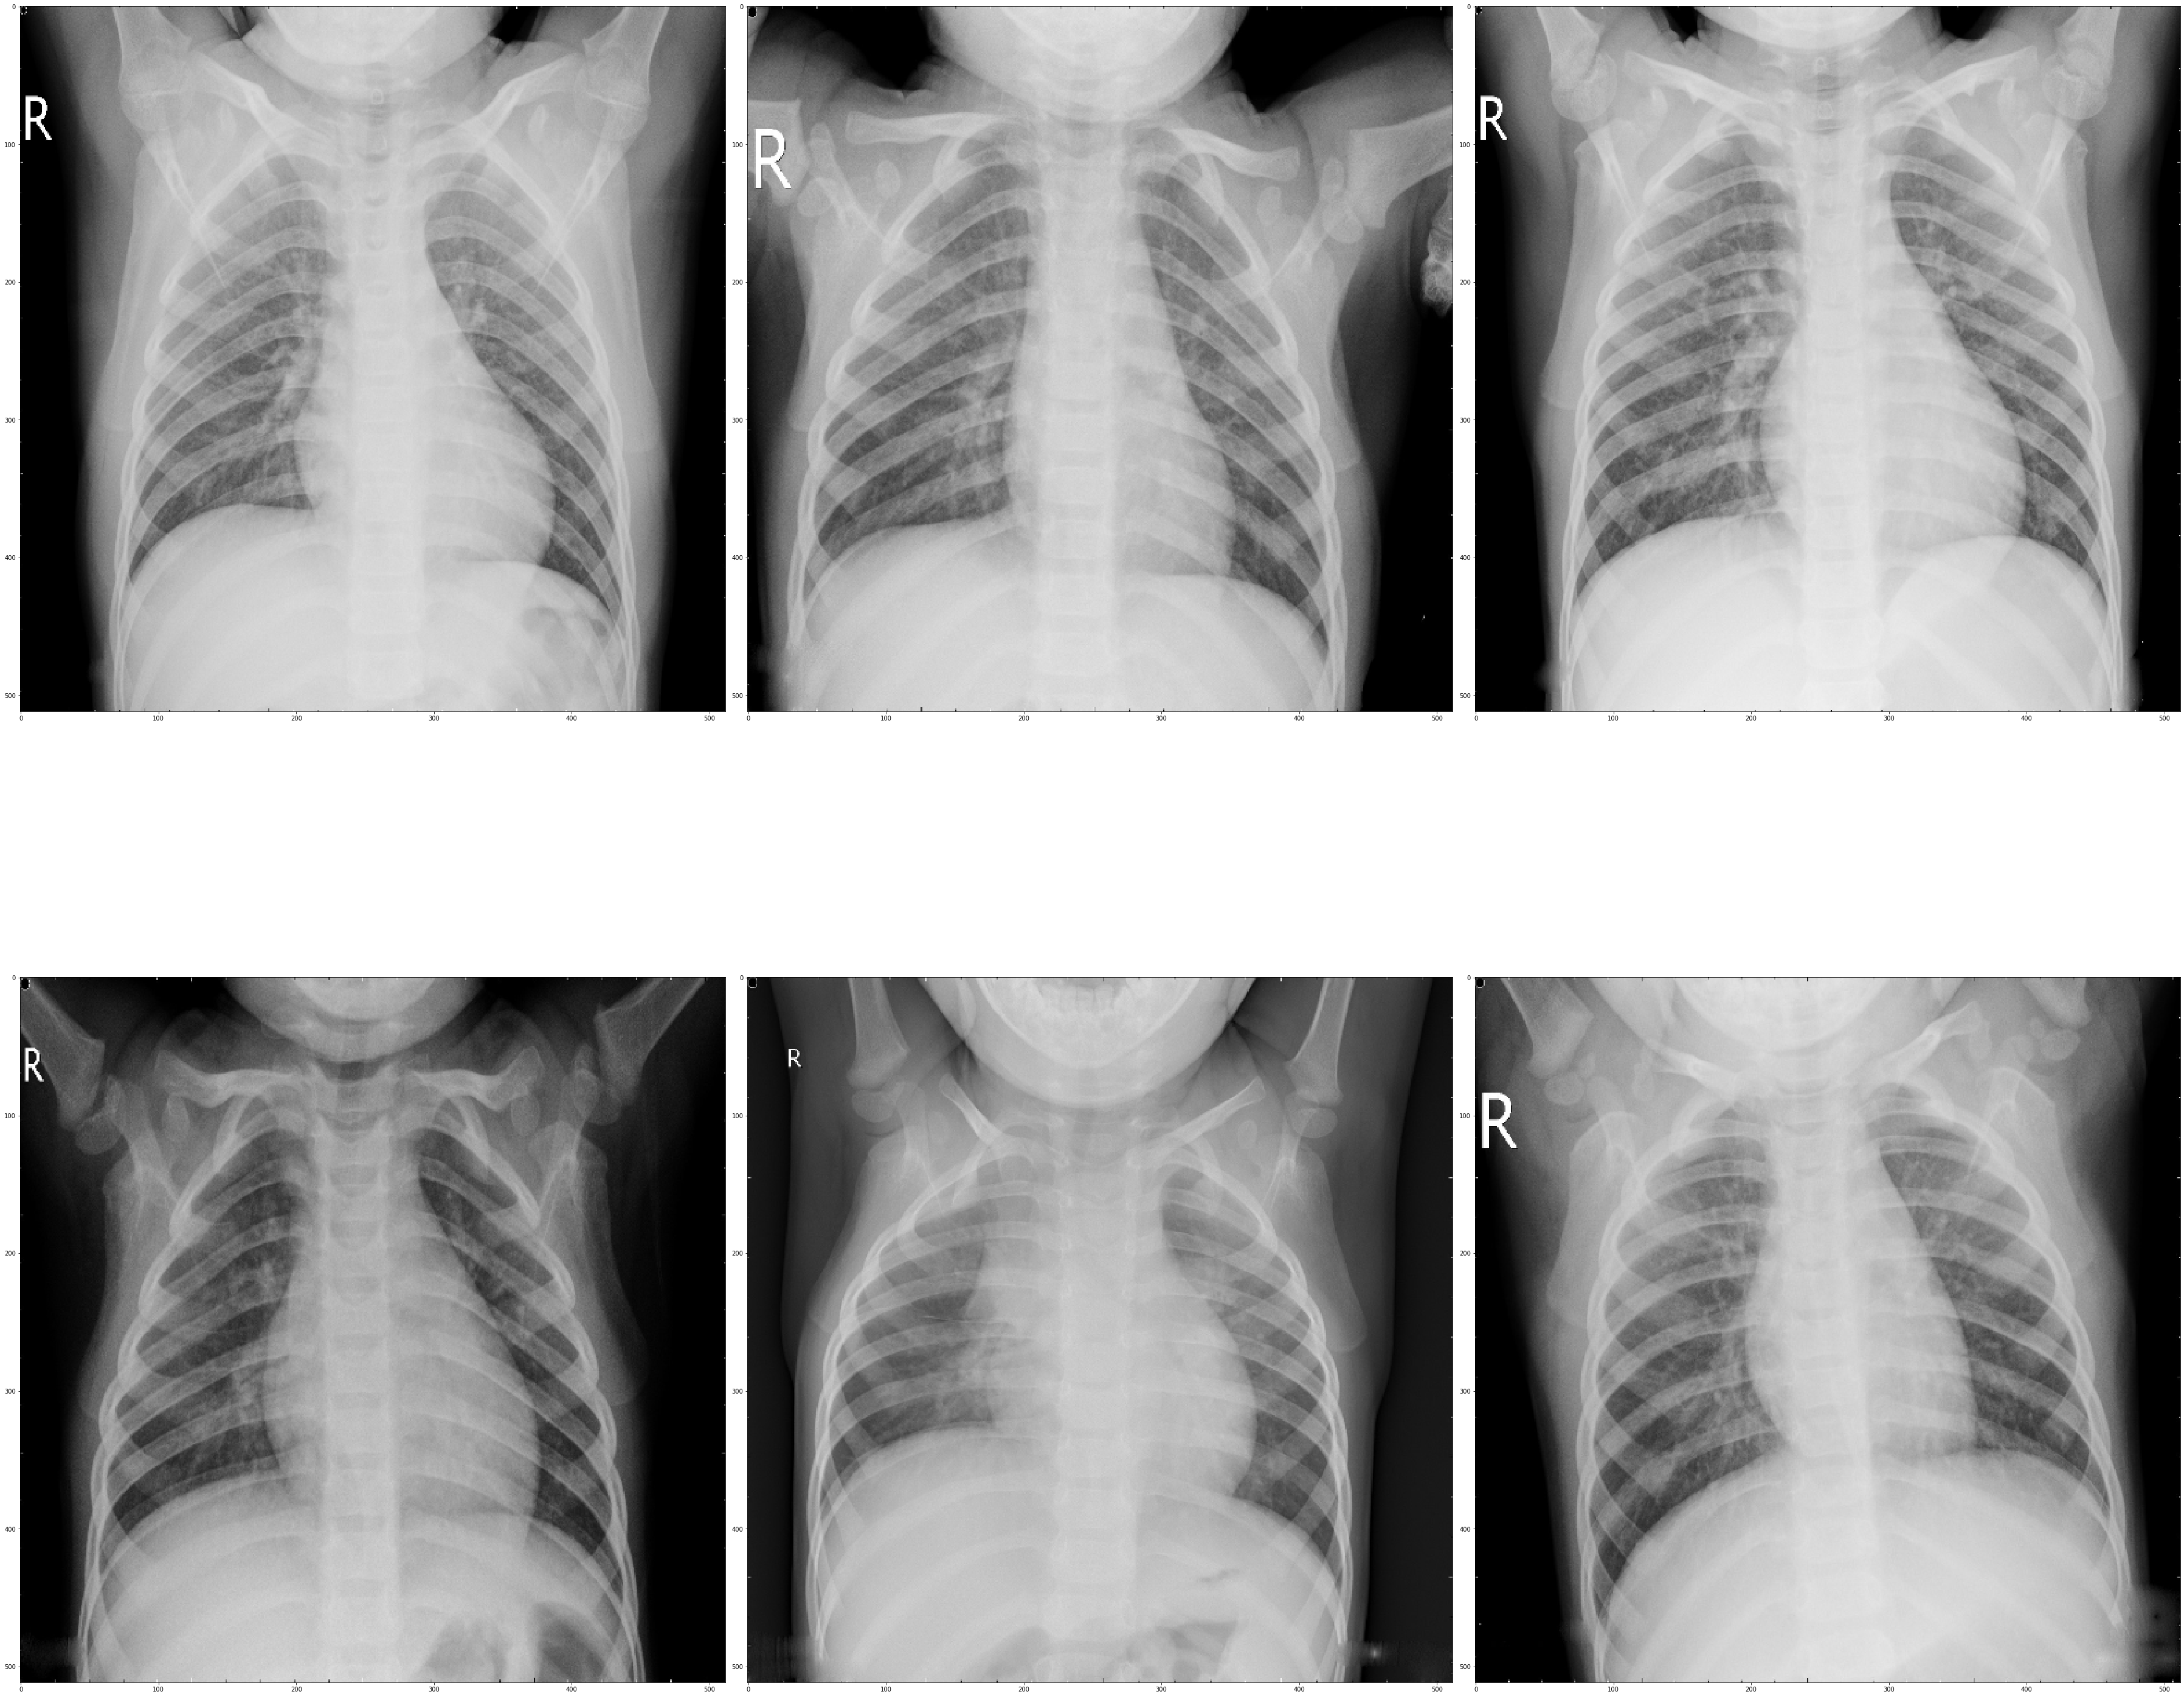

In [4]:
path='val/NORMAL/'
i=0
plt.figure(figsize=(50, 50))
for root,dirs,files in os.walk(path):
    for f in files[:6]:
        plt.subplot(2, 3, i+1)
        image = cv2.imread(path+f)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,(512,512))
#         plt.imshow(image,cmap='gray')
        plt.imshow(image)
        i=i+1

plt.tight_layout()
plt.show()


In [5]:
def test():
    x = []
    y = []
    path = "test/NORMAL/"
    for root,dirs,files in os.walk(path):
        for f in files:
            if fnmatch.fnmatch(f,"*.jpeg"):
                img = cv2.imread(path+f,0)
                img = cv2.resize(img,(224,224))
                x.append(img)
                y.append(1)
    path = "test/PNEUMONIA/"
    for root,dirs,files in os.walk(path):
        for f in files:
            if fnmatch.fnmatch(f,"*.jpeg"):
                img = cv2.imread(path+f,0)
                img = cv2.resize(img,(224,224))
                x.append(img)
                y.append(0)
    return np.array(x),np.array(y)


In [6]:
def valid():
    x = []
    y = []
    path = "val/NORMAL/"
    for root,dirs,files in os.walk(path):
        for f in files:
            if fnmatch.fnmatch(f,"*.jpeg"):
                img = cv2.imread(path+f,0)
                img = cv2.resize(img,(224,224))
                x.append(img)
                y.append(1)
    path = "val/PNEUMONIA/"
    for root,dirs,files in os.walk(path):
        for f in files:
            if fnmatch.fnmatch(f,"*.jpeg"):
                img = cv2.imread(path+f,0)
                img = cv2.resize(img,(224,224))
                x.append(img)
                y.append(0)
    return np.array(x),np.array(y)


In [7]:
def train():
    x = []
    y = []
    path = "train/NORMAL/"
    for root,dirs,files in os.walk(path):
        for f in files:
            if fnmatch.fnmatch(f,"*.jpeg"):
                img = cv2.imread(path+f,0)
                img = cv2.resize(img,(224,224))
                x.append(img)
                y.append(1)
    path = "train/PNEUMONIA/"
    for root,dirs,files in os.walk(path):
        for f in files:
            if fnmatch.fnmatch(f,"*.jpeg"):
                img = cv2.imread(path+f,0)
                img = cv2.resize(img,(224,224))
                x.append(img)
                y.append(0)
    return np.array(x),np.array(y)


In [ ]:
valid_x,valid_y = valid()
train_x,train_y = train()
test_x,test_y = test()

In [8]:
train_x.shape,test_x.shape,valid_x.shape

((5216, 224, 224), (624, 224, 224), (16, 224, 224))

In [9]:
# plt.imshow(test_x[0])

In [10]:
#df = np.append(train_x, train_y, axis=1)
#df = df.sample(frac=1)

In [233]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.3,random_state=42)


**Flattening the datasets**

In [ ]:
train_x

In [19]:
number_of_train = train_x.shape[0]
number_of_test = test_y.shape[0]
x_train_flatten = train_x.reshape(number_of_train,train_x.shape[1]*train_x.shape[2])
x_test_flatten = test_x.reshape(number_of_test,test_x.shape[1]*test_x.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (5216, 50176)
X test flatten (624, 50176)


In [20]:
x_train = x_train_flatten
x_test = x_test_flatten
y_train = train_y
y_test = test_y
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (5216, 50176)
x test:  (624, 50176)
y train:  (5216,)
y test:  (624,)


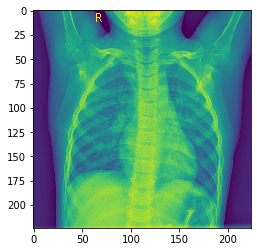

In [29]:
plt.imshow(x_train[0].reshape(224,224))

**1. Logistic Regression (SKLEARN)**

In [34]:
from sklearn.linear_model import LogisticRegression

# from sklearn import svm

# lg_classifier = LogisticRegression(C=1,penalty="l1")

lg_classifier = LogisticRegression()
lg_classifier.fit(x_train, y_train)


predictions = lg_classifier.predict(x_test)

from sklearn.metrics import confusion_matrix,classification_report
print("Confusion Matrix")
print(pd.crosstab(y_test, predictions, rownames=['Label'], colnames=['Predicted'], margins=True))

print("Classification Report")
print(classification_report(y_test,predictions))

C:\Users\zics\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix
Predicted    0   1  All
Label                  
0          385   5  390
1          157  77  234
All        542  82  624
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.99      0.83       390
           1       0.94      0.33      0.49       234

    accuracy                           0.74       624
   macro avg       0.82      0.66      0.66       624
weighted avg       0.80      0.74      0.70       624



**test accuracy: 0.7403846153846154**

and 
WITH LogisticRegression(C=1,penalty="l1")

**test accuracy: 0.7483974358974359**


In [11]:
train_x.shape,test_x.shape,valid_x.shape

((5216, 224, 224), (624, 224, 224), (16, 224, 224))

**2. CNN**

In [58]:
cnn = Sequential()

#add model layers
cnn.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(224,224,1)))
cnn.add(Conv2D(32, kernel_size=3, activation="relu"))
# Flatten the layer
cnn.add(Flatten())
# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))
# Compile the Neural network

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [59]:
cnn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 222, 222, 64)      640       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 220, 220, 32)      18464     
_________________________________________________________________
flatten_7 (Flatten)          (None, 1548800)           0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               198246528 
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 129       
Total params: 198,265,761
Trainable params: 198,265,761
Non-trainable params: 0
_________________________________________________________________


In [60]:
cnn_model = cnn.fit(x_train1, y_train1, validation_data=(x_test1, y_test1), epochs=10)


Train on 963 samples, validate on 270 samples
Epoch 1/10
963/963 [==============================] - 485s 504ms/step - loss: 933.1767 - accuracy: 0.5784 - val_loss: 0.8007 - val_accuracy: 0.5741
Epoch 2/10
963/963 [==============================] - 459s 477ms/step - loss: 0.2668 - accuracy: 0.8951 - val_loss: 0.8720 - val_accuracy: 0.5815
Epoch 3/10
963/963 [==============================] - 483s 502ms/step - loss: 0.0826 - accuracy: 0.9834 - val_loss: 0.9553 - val_accuracy: 0.5963
Epoch 4/10
963/963 [==============================] - 468s 486ms/step - loss: 0.0333 - accuracy: 0.9958 - val_loss: 1.0444 - val_accuracy: 0.5963
Epoch 5/10
963/963 [==============================] - 380s 394ms/step - loss: 0.0176 - accuracy: 0.9969 - val_loss: 1.2076 - val_accuracy: 0.5778
Epoch 6/10
963/963 [==============================] - 410s 426ms/step - loss: 0.0090 - accuracy: 0.9990 - val_loss: 1.4563 - val_accuracy: 0.5815
Epoch 7/10
963/963 [==============================] - 377s 391ms/step - loss

Train on 963 samples, validate on 270 samples

Epoch 1/10
963/963 [==============================] - 485s 504ms/step - loss: 933.1767 - accuracy: 0.5784 - val_loss: 0.8007 - val_accuracy: 0.5741
Epoch 2/10
963/963 [==============================] - 459s 477ms/step - loss: 0.2668 - accuracy: 0.8951 - val_loss: 0.8720 - val_accuracy: 0.5815
Epoch 3/10
963/963 [==============================] - 483s 502ms/step - loss: 0.0826 - accuracy: 0.9834 - val_loss: 0.9553 - val_accuracy: 0.5963
Epoch 4/10
963/963 [==============================] - 468s 486ms/step - loss: 0.0333 - accuracy: 0.9958 - val_loss: 1.0444 - val_accuracy: 0.5963
Epoch 5/10
963/963 [==============================] - 380s 394ms/step - loss: 0.0176 - accuracy: 0.9969 - val_loss: 1.2076 - val_accuracy: 0.5778
Epoch 6/10
963/963 [==============================] - 410s 426ms/step - loss: 0.0090 - accuracy: 0.9990 - val_loss: 1.4563 - val_accuracy: 0.5815
Epoch 7/10
963/963 [==============================] - 377s 391ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.5763 - val_accuracy: 0.6185
Epoch 8/10
963/963 [==============================] - 449s 466ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.8712 - val_accuracy: 0.5963
Epoch 9/10
963/963 [==============================] - 434s 451ms/step - loss: 2.4691e-04 - accuracy: 1.0000 - val_loss: 2.2633 - val_accuracy: 0.6185
Epoch 10/10
963/963 [==============================] - 397s 413ms/step - loss: 8.6177e-05 - accuracy: 1.0000 - val_loss: 2.2261 - val_accuracy: 0.6259


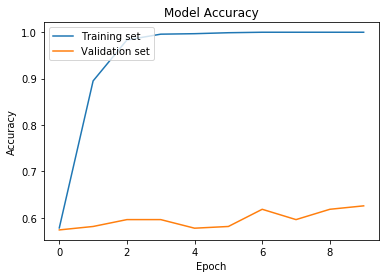

In [125]:
# Accuracy 
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()


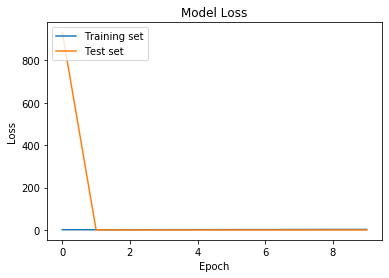

In [126]:

plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

**USING CXR SEG (U-NET)**

In [37]:
def test():
    x = []
    y = []
    path = "test/NORMAL/"
    for root,dirs,files in os.walk(path):
        for f in files[:100]:
            if fnmatch.fnmatch(f,"*.jpeg"):
                img = cv2.imread(path+f,0)
                img = cv2.resize(img,(512,512))
                x.append(img)
                y.append(1)
    path = "test/PNEUMONIA/"
    for root,dirs,files in os.walk(path):
        for f in files[:100]:
            if fnmatch.fnmatch(f,"*.jpeg"):
                img = cv2.imread(path+f,0)
                img = cv2.resize(img,(512,512))
                x.append(img)
                y.append(0)
    return np.array(x),np.array(y)


def valid():
    x = []
    y = []
    path = "val/NORMAL/"
    for root,dirs,files in os.walk(path):
        for f in files:
            if fnmatch.fnmatch(f,"*.jpeg"):
                img = cv2.imread(path+f,0)
                img = cv2.resize(img,(512,512))
                x.append(img)
                y.append(1)
    path = "val/PNEUMONIA/"
    for root,dirs,files in os.walk(path):
        for f in files:
            if fnmatch.fnmatch(f,"*.jpeg"):
                img = cv2.imread(path+f,0)
                img = cv2.resize(img,(512,512))
                x.append(img)
                y.append(0)
    return np.array(x),np.array(y)


def train():
    x = []
    y = []
    path = "train/NORMAL/"
    for root,dirs,files in os.walk(path):
        for f in files[:500]:
            if fnmatch.fnmatch(f,"*.jpeg"):
                img = cv2.imread(path+f,0)
                img = cv2.resize(img,(512,512))
                x.append(img)
                y.append(1)
    path = "train/PNEUMONIA/"
    for root,dirs,files in os.walk(path):
        for f in files[:500]:
            if fnmatch.fnmatch(f,"*.jpeg"):
                img = cv2.imread(path+f,0)
                img = cv2.resize(img,(512,512))
                x.append(img)
                y.append(0)
    return np.array(x),np.array(y)

In [38]:
dim = 512

valid_x,valid_y = valid()
train_x,train_y = train()
test_x,test_y = test()

In [39]:
train_x.shape,test_x.shape,valid_x.shape

((1000, 512, 512), (200, 512, 512), (16, 512, 512))

In [40]:
X_train = np.array(train_x).reshape(len(train_x),dim,dim,1)
X_test = np.array(test_x).reshape(len(test_x),dim,dim,1)


In [41]:
X_train = (X_train-127.0)/127.0
X_test = (X_test-127.0)/127.0

In [42]:
X_train.dtype,X_test.dtype

(dtype('float64'), dtype('float64'))

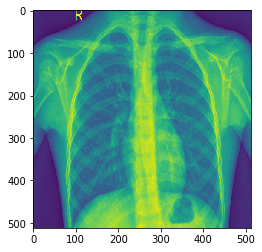

In [43]:
plt.imshow(X_test[0].reshape(512,512))

In [44]:
from keras.models import model_from_json
from keras import backend as K

def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

In [45]:
json_file = open('unet_model_cxr_seg.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("unet_model_cxr_seg.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(optimizer=Adam(lr=2e-4),loss=[dice_coef_loss], metrics = [dice_coef, 'binary_accuracy'])

Loaded model from disk


In [48]:
asd = X_train[:5]
asdd = loaded_model.predict(asd)

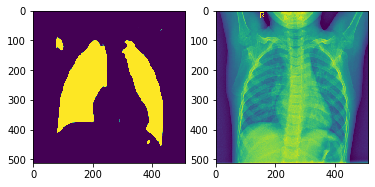

In [57]:
plt.subplot(1, 2, 1)
plt.imshow(np.squeeze(asdd[0]))
plt.subplot(1, 2, 2)
plt.imshow(X_train[0].reshape(512,512))

In [17]:
X_train_mask = loaded_model.predict(X_train)
X_test_mask = loaded_model.predict(X_test)

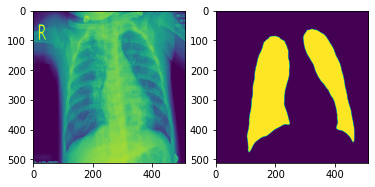

In [18]:
plt.subplot(1, 2, 1)
plt.imshow(test_x[160])
plt.subplot(1, 2, 2)
plt.imshow(X_test_mask[160].reshape(512,512))



In [19]:
X_test_mask = X_test_mask.reshape(len(X_test_mask),dim,dim)
X_train_mask = X_train_mask.reshape(len(X_train_mask),dim,dim)

In [20]:
X_test_mask.shape,X_train_mask.shape

((200, 512, 512), (1000, 512, 512))

In [21]:
test_x1 = test_x * X_test_mask
train_x1 = train_x * X_train_mask

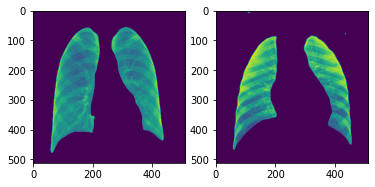

In [26]:
plt.subplot(1, 2, 1)
plt.imshow(test_x1[50])
plt.subplot(1, 2, 2)
plt.imshow(train_x1[5])



In [23]:
test_x1 = (test_x1*127)+127
train_x1 = (train_x1 *127)+127

test_x1 = test_x1.astype(int)
train_x1 = train_x1.astype(int)

In [24]:
train_x1 = np.array(train_x1).reshape(len(train_x1),dim,dim,1)
test_x1 = np.array(test_x1).reshape(len(test_x1),dim,dim,1)

In [50]:
train_x1.shape,train_y.shape

((1000, 512, 512, 1), (1000,))

In [46]:
from keras.layers import MaxPool2D, Flatten


In [57]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same",
                 input_shape=(64,64,1)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.4))
model.add(Dense(2, activation="softmax"))


In [59]:
model.compile(Adam(lr=0.001),loss="categorical_crossentropy", metrics=["accuracy"])


In [60]:
model.fit(train_x1,train_y,validation_data=(test_x1,test_y),epochs=3)


Epoch 1/3
326/326 [==============================] - 66s 202ms/step - loss: 0.2918 - accuracy: 0.9160 - val_loss: 1.5757 - val_accuracy: 0.5625
Epoch 2/3
326/326 [==============================] - 54s 167ms/step - loss: 0.1445 - accuracy: 0.9484 - val_loss: 2.7809 - val_accuracy: 0.5000
Epoch 3/3
326/326 [==============================] - 55s 169ms/step - loss: 0.1465 - accuracy: 0.9505 - val_loss: 1.0821 - val_accuracy: 0.7500


In [61]:
model.compile(Adam(lr=0.0001),loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(train_x1,train_y,validation_data=(x_test1,test_y),epochs=3)


Epoch 1/3
326/326 [==============================] - 56s 171ms/step - loss: 0.0862 - accuracy: 0.9670 - val_loss: 0.1366 - val_accuracy: 0.9375
Epoch 2/3
326/326 [==============================] - 55s 169ms/step - loss: 0.0779 - accuracy: 0.9711 - val_loss: 1.6778 - val_accuracy: 0.6250
Epoch 3/3
326/326 [==============================] - 55s 169ms/step - loss: 0.0633 - accuracy: 0.9776 - val_loss: 1.4495 - val_accuracy: 0.6250


In [62]:
p = model.predict_generator(test_batches, verbose=True)
pre = pd.DataFrame(p)
pre["filename"] = test_batches.filenames
pre["label"] = (pre["filename"].str.contains("PNEUMONIA")).apply(int)
pre['pre'] = (pre[1]>0.5).apply(int)


78/78 [==============================] - 6s 82ms/step


In [60]:
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,recall_score
from keras.metrics import categorical_accuracy


In [59]:
recall_score(pre["label"],pre["pre"])


NameError: name 'pre' is not defined

In [66]:
roc_auc_score(pre["label"],pre[1])


0.8907078676309446

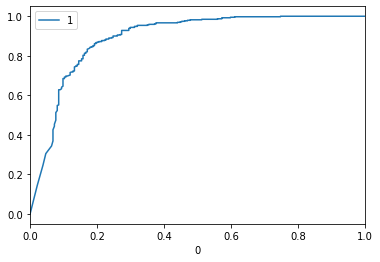

In [67]:
tpr,fpr,thres = roc_curve(pre["label"],pre[1])
roc = pd.DataFrame([tpr,fpr]).T
roc.plot(x=0,y=1)


In [15]:
# SAVING model
model_json = model.to_json()
with open("final_model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("final_model.h5")
print("Saved final_model to disk")

Saved model to disk


In [61]:
json_file = open('final_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("final_model.h5")

# evaluate loaded model on test data
loaded_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [66]:
# TEST
img = plt.imread('test/NORMAL/IM-0007-0001.jpeg')
img = cv2.resize(img, (150,150))
img = np.dstack([img, img, img])
img = img.astype('float32') / 255
img = [img,img]
img = np.array(img)

In [67]:
res = loaded_model.predict(img)

In [68]:
int(np.round(res[0]))

0